<b> <font color="green"><center><h2> Aplicación de Computer Vision mediante Redes Neuronales en el proceso de inspección de calidad del aguacate Hass para exportación. </h2></center></font> </b>  

<center><img id="im" src = "https://lh3.googleusercontent.com/Nf9l69Wt5j6B8WMd-paBxj2RNPN1cgyfc4HV4-oZXzgfbPQIXdkxR_Q12P52FDK745cq2gC7-YfmIAKrGHHRPPBM0pI2dYnpHFMib8augSikrMqxKlEX-787TXCeZEjojIsG2_7k0D3lMr8auvWGlpMPIpba7CrPo1hKr3LXjJxLEJ1208XU7aRit4Xfu8LQKJgb9a3T1fJO24aF2_XZcELcUBTKHIC28cxMoOubl7qTkLeqQWBXFRm6d_K_Zmk6_WWXC9EbXsPc1BAFSpvUi76Z1MSMcSz-FKUNKExMIhsfd7_o857FIENBt-5COthrWj2tz1tn20HjPoTIwCqAAqDbFNZQna_qICjrFRDZGa79MjTBDhMXKUUtJHalRvbvbRBr4pcID773kwTBP4us3QsELuWzPmqoJOLW0qJXbLpgmUKOfo6KuRVzVt1J8iFvD44HguqeB5SOjxXwDoGGjFk22BcPt_5juX5rytMMhFwh3LJ16SOLZmzmCkAd5ImMkcLhJOwJ_bsnJG1u9w0gyqjKsS-uKN2L0j8IU066M1aIb9vzXbZMovz2Ssmp3wZIrktlDbdwoyqNdTorVDAfXfWmhVf36ZOgZj7dZaBqpkmSl6n5qfwoTQ8Sb0gCQHvGEI3oQxxf8IaqIkq42zzegPlgUjQl0VCy1ph3O5t2W9qJHMy4wrjKTzDmjEA=w469-h625-no?authuser=3" height = "150"/></center> <br/>

<hr color ="black" width="70%"/>
<br/>

<justify><p> El presente proyecto busca realizar una aplicación de Computer vision por medio de una red neuronal que logre clasificar el aguacate Hass para exportación mediante  la identificación de estándares mínimos exigidos en su apariencia física . Esto por medio de  inspección visual (pruebas no destructivas) que permiten que el proceso se automatice logrando mitigar los errores acaecidos por yerros humanos propios del proceso convencional.</p></justify><br/>


In [ ]:
# Ruta de acceso a las fotos
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Importando las librerias necesarias para entrenar la red neuronal
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.models import Model, load_model 
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.initializers import glorot_uniform
import scipy.misc
from sklearn.model_selection import train_test_split
import keras.backend as k
from keras.callbacks import ModelCheckpoint as model_checkpoint
import tensorflow.keras.losses as losses
%matplotlib inline

ImportError: ignored

In [ ]:
#========================
train_cump = "/content/drive/MyDrive/Aguacates/Training/Cumple"
train_no_cump = "/content/drive/MyDrive/Aguacates/Training/No_Cumple"
test_cump = "/content/drive/MyDrive/Aguacates/Test/Cumple"
test_no_cump = "/content/drive/MyDrive/Aguacates/Test/No_Cumple"
dev_cump = "/content/drive/MyDrive/Aguacates/Validation/Cumple"
dev_no_cump = "/content/drive/MyDrive/Aguacates/Validation/No_Cumple"

In [ ]:
print("Imagenes de entrenamiento totales de aguacates que cumplen con las características de exportación", len(os.listdir(train_cump)))
print("Imagenes de entrenamiento totales de aguacates que no cumplen con las características de exportación", len(os.listdir(train_no_cump)))
print("Imagenes de prueba totales de aguacates que cumplen con las características de exportación",len(os.listdir(test_cump)))
print("Imagenes de prueba totales de aguacates que no cumplen con las características de exportación",len(os.listdir(test_no_cump)))
print("Imagenes de validación totales de aguacates que cumplen con las características de exportación",len(os.listdir(dev_cump)))
print("Imagenes de validación totales de aguacates que no cumplen con las características de exportación",len(os.listdir(dev_no_cump)))

Imagenes de entrenamiento totales de aguacates que cumplen con las características de exportación 763
Imagenes de entrenamiento totales de aguacates que no cumplen con las características de exportación 707
Imagenes de prueba totales de aguacates que cumplen con las características de exportación 255
Imagenes de prueba totales de aguacates que no cumplen con las características de exportación 235
Imagenes de validación totales de aguacates que cumplen con las características de exportación 255
Imagenes de validación totales de aguacates que no cumplen con las características de exportación 235


<p>Para ver una muestra de las fotos que se usan para entrenar la red neuronal. A conitnuación, se presentan un lote de 8 fotos que cumplen con los requerimientos de exportación y 8 que no cumplen con los requerimientos para exportar aguacate hass.</p>

In [ ]:
train_cumple_nombres =  os.listdir(train_cump)
train_no_cumple_nombres = os.listdir(train_no_cump)
validation_cumple = os.listdir(dev_cump)
validation_no_cumple = os.listdir(dev_no_cump)

<function matplotlib.pyplot.show>

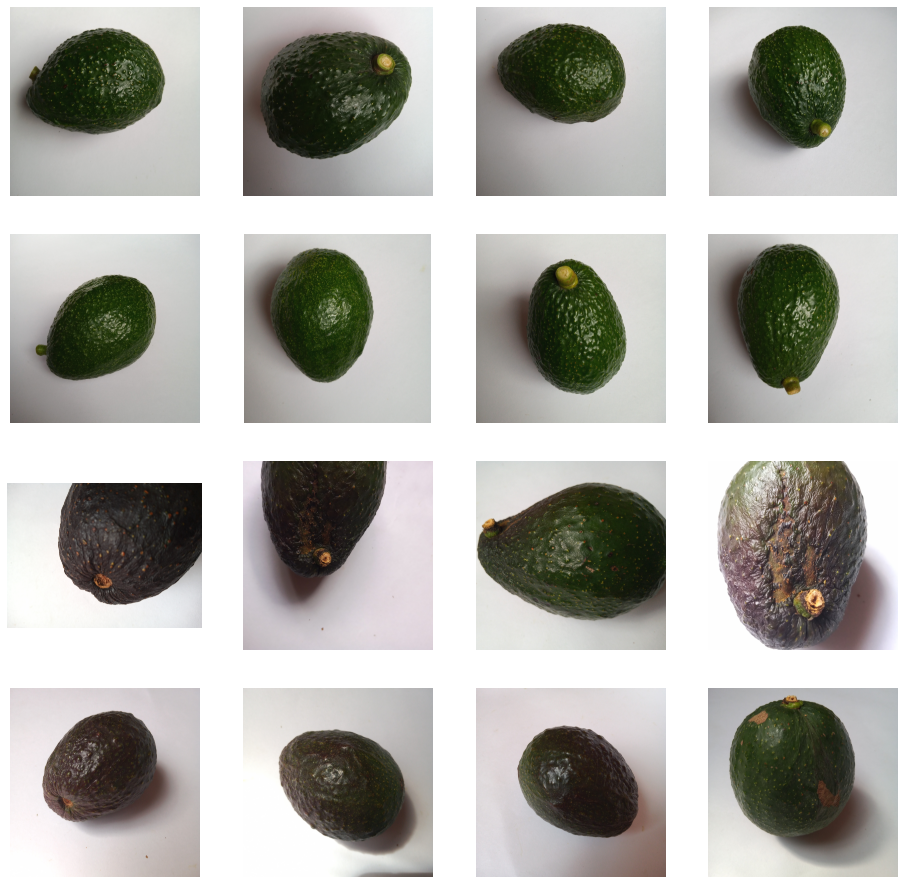

In [ ]:
nfilas = 4
ncolumnas = 4
indice_pic = 0
fig = plt.gcf()
fig.set_size_inches(ncolumnas*4, nfilas*4)
indice_pic += 8
aguacate_cumple = [os.path.join(train_cump,fnombre) for fnombre in train_cumple_nombres[indice_pic-8:indice_pic]]
aguacate_no_cumple = [os.path.join(train_no_cump,fnombre) for fnombre in train_no_cumple_nombres[indice_pic-8:indice_pic]]

for i, img_path in enumerate(aguacate_cumple+aguacate_no_cumple):
  #subplot
  sp = plt.subplot(nfilas, ncolumnas, i+1)
  sp.axis("off")

  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show

<h3> <b> Rest Net 50 </b></h3>
<p>En este segmento se implementa una red neuronal conocida como Res Net 50 (Red neuronal residual con 50 capas) con el objetivo de alcanzar una mayor profunidad en el entrenamiento de la red, evitando por un lado, un famoso problema en las redes neuronales profundas conocido como vanishing (desvanecimiento), que se caracteriza por una obstaculización en el entrenamiento de la red desde que empieza a entrenarse el modelo. He, Zhang, Ren y Sun(2015) causando que el modelo reduzca el aprendizaje debido al pequeño valor del gradiente que no es lo suficiente significativo para generar valor al entrenamiento.
</p>
<br/>




<p>
En primera instancia se debe establecer el bloque de identidad que relaciona el bloque de atajo con el bloque principal de la red, uniendo los dos componentes en la tercera capa principal, algo que se debe tener en cuenta es el hecho que la última capa no debe tener activación debido precisamente a la unión de las capas de la red.
</p>

In [ ]:
def bloque_identidad(X, f, filtros, etapa, bloque):
    
    # Definir los nombre básicos
    conv_name_base = 'res' + str(etapa) + bloque + '_rama'
    bn_name_base = 'bn' + str(etapa) + bloque + '_rama'
    # Reciviendo los filtros
    f1, f2, f3 = filtros
    # Establecer el bloque de entrada que se usará luego en la unión con el otro bloque convolucional
    salto = X
    
    # Primera capa o bloque
    X = Conv2D(filters = f1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=1))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Segunda capa
    X = Conv2D(filters=f2,kernel_size=(f,f),strides=(1,1),padding='same',name=conv_name_base +'2b',kernel_initializer=glorot_uniform(seed=1))(X)
    X = BatchNormalization(axis=3,name=bn_name_base +'2b')(X)
    X = Activation('relu')(X)

    # Tercera capa
    X = Conv2D(filters=f3,kernel_size=(1,1),strides=(1,1),padding='valid', name=conv_name_base +'2c', kernel_initializer=glorot_uniform(seed=1))(X)
    X = BatchNormalization(axis=3, name = bn_name_base +'2c')(X)

    # Capa final de unión
    X = Add()([salto,X])
    X = Activation('relu')(X)
    
    return X

In [ ]:
def bloque_de_convolucion(X, f, filtros, etapa, bloque, s = 2):
    
    # Definir los nombre básicos
    conv_name_base = 'res' + str(etapa) + bloque + '_branch'
    bn_name_base = 'bn' + str(etapa) + bloque + '_branch'
    # Reciviendo los filtros
    f1, f2, f3 = filtros
    # Save the input value
    salto = X

    # First component of main path 
    X = Conv2D(f1, (1, 1), strides = (s, s), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=1))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path (≈3 lines)
    X = Conv2D(f2, (f, f), strides = (1, 1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=1))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(f3, (1, 1), strides = (1, 1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=1))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # SHORTCUT PATH #
    salto = Conv2D(f3, (1, 1), strides = (s, s), padding = 'valid', name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=1))(salto)
    salto = BatchNormalization(axis = 3, name = bn_name_base + '1')(salto)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, salto])
    X = Activation('relu')(X)
    
    return X

In [ ]:
def ResNet50(input_shape = (256, 256, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)
    
    # Etapa inicial
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Etapa 1
    X = bloque_de_convolucion(X, f = 3, filtros = [256, 256, 256], etapa = 2, bloque='a', s = 1)
    X = bloque_identidad(X, 3, [256, 256, 256], etapa=2, bloque='b')
    X = bloque_identidad(X, 3, [256, 256, 256], etapa=2, bloque='c')

    # Etapa 2 
    X = bloque_de_convolucion(X,f=3,filtros=[512,512,256],etapa=3,bloque='a',s = 2)
    X = bloque_identidad(X,3,[512,512,256],etapa=3,bloque='b')
    X = bloque_identidad(X,3,[512,512,256],etapa=3,bloque='c')
    X = bloque_identidad(X,3,[512,512,256],etapa=3,bloque='d')

    # Etapa 3 
    X = bloque_de_convolucion(X,f=3,filtros=[1024,1024,1024],etapa=4,bloque='a',s=2)
    X = bloque_identidad(X,3,[1024,1024,1024],etapa=4,bloque='b')
    X = bloque_identidad(X,3,[1024,1024,1024],etapa=4,bloque='c')
    X = bloque_identidad(X,3,[1024,1024,1024],etapa=4,bloque='d')
    X = bloque_identidad(X,3,[1024,1024,1024],etapa=4,bloque='e')
    X = bloque_identidad(X,3,[1024,1024,1024],etapa=4,bloque='f')

    # Etapa 4 
    X = bloque_de_convolucion(X,f=3,filtros=[2048,2048,2048],etapa=5,bloque='a',s=2)
    X = bloque_identidad(X,3,[2048,2048,2048],etapa=5,bloque='b')
    X = bloque_identidad(X,3,[2048,2048,2048],etapa=5,bloque='c')

    # AVGPOOL 
    X = AveragePooling2D(pool_size=(2,2))(X)

    # Capa de salida
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', kernel_initializer = glorot_uniform(seed=0))(X)
    
    # Crear el modelo
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [ ]:
model = ResNet50(input_shape = (256, 256, 3))

In [ ]:
model.compile(loss = losses.BinaryCrossentropy(), optimizer = RMSprop(learning_rate= 0.001), metrics = ['accuracy'])

In [ ]:
path_save = "/content/drive/MyDrive/chekpoints/" 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#Normalizar las imagenes para facilitar el procesamiento teniendo en cuenta que son fotos a color (RGB)
train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)
test_detagen = ImageDataGenerator(rescale= 1/255)

#Preparar las fotos de entrenamiento 
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Aguacates/Training",
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary'
)

#Preparar las fotos de validacion
validation_generator = validation_datagen.flow_from_directory(
    "/content/drive/MyDrive/Aguacates/Validation",
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary'
)

#Preparar las fotos de prueba
test_generator = test_detagen.flow_from_directory(
    "/content/drive/MyDrive/Aguacates/Test",
    target_size = (256,256),
    class_mode = 'binary'
)


Found 1470 images belonging to 2 classes.
Found 490 images belonging to 2 classes.
Found 490 images belonging to 2 classes.


In [ ]:
"""class myCallback(Callback):
  def on_epoch_end(self, epoch, logs ={}):
    if (logs.get('accuracy')>= 0.80):
      print("\n accuracy is higher, stops training")
      self.model.stop_training = True """

'class myCallback(Callback):\n  def on_epoch_end(self, epoch, logs ={}):\n    if (logs.get(\'accuracy\')>= 0.80):\n      print("\n accuracy is higher, stops training")\n      self.model.stop_training = True '

In [ ]:
checkpoint = model_checkpoint(filepath = path_save + 'ResNet50_aguacates.h5', save_best_only=True, verbose=1)

In [ ]:
history = model.fit(
      train_generator,
      callbacks = [checkpoint],
      steps_per_epoch=46,  
      epochs=50,
      batch_size = 32,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=16
      )

Epoch 1/50
46/46 [==============================] - 738s 16s/step - loss: 6.4779 - accuracy: 0.5647 - val_loss: 2075929.5000 - val_accuracy: 0.4837

Epoch 00001: val_loss improved from inf to 2075929.50000, saving model to /content/drive/MyDrive/chekpoints/ResNet50_aguacates.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
46/46 [==============================] - 111s 2s/step - loss: 3.2569 - accuracy: 0.5826 - val_loss: 237039.3750 - val_accuracy: 0.5204

Epoch 00002: val_loss improved from 2075929.50000 to 237039.37500, saving model to /content/drive/MyDrive/chekpoints/ResNet50_aguacates.h5
Epoch 3/50
46/46 [==============================] - 103s 2s/step - loss: 1.7437 - accuracy: 0.5702 - val_loss: 45614.3789 - val_accuracy: 0.5204

Epoch 00003: val_loss improved from 237039.37500 to 45614.37891, saving model to /content/drive/MyDrive/chekpoints/ResNet50_aguacates.h5
Epoch 4/50
46/46 [==============================] - 105s 2s/step - loss: 1.4782 - accuracy: 0.6369 - val_loss: 1408.8790 - val_accuracy: 0.4980

Epoch 00004: val_loss improved from 45614.37891 to 1408.87903, saving model to /content/drive/MyDrive/chekpoints/ResNet50_aguacates.h5
Epoch 5/50
46/46 [==============================] - 108s 2s/step - loss: 1.5443 - accuracy: 0.5814 - val_loss: 166.0732 - val_accuracy: 0.5204

Epoch 0

In [ ]:
model = load_model(path_save + 'ResNet50_aguacates.h5')

In [ ]:
evaluacion = model.evaluate(test_generator)
print ("Loss = " + str(evaluacion[0]))
print ("Test Accuracy = " + str(evaluacion[1]))

16/16 [==============================] - 199s 10s/step - loss: 0.1190 - accuracy: 0.9571
Loss = 0.11899634450674057
Test Accuracy = 0.9571428298950195


In [ ]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

<p>He,K Zhang,X Ren,S, Sun,J (2015) <i>Deep Residual Learning for Image Recognition</i></p>
Estados Unidos: Microsoft Reseacrh 






In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)